In [ ]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.datasets import load_wine

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

* We have loaded the necessary libraries above
* Now let's load the data

In [ ]:
data = load_wine(as_frame=True)
df = data.data.copy()  # features
# Look at the documentation (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html)
# and save the label in a column called 'y' in df.
df['y'] = data.target
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,y
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [ ]:
#How many samples and features are there?

# YOUR CODE HERE
print('number of samples:',df.shape[0], 'number of features:',df.shape[1])

number of samples: 178 number of features: 14


In [ ]:
# Quiz Q1
# How many instances are there for each class? 
print(df.y.value_counts())
# YOUR CODE HERE


1    71
0    59
2    48
Name: y, dtype: int64


In [ ]:
# Calculate the means, medians, and standard deviations of each feature
# YOUR CODE HERE
mean_df=df.mean(axis=0)
median_df=df.median(axis=0)
sd_df=df.std(axis=0)

print(mean_df)
print(median_df)
print(sd_df)



alcohol                          13.000618
malic_acid                        2.336348
ash                               2.366517
alcalinity_of_ash                19.494944
magnesium                        99.741573
total_phenols                     2.295112
flavanoids                        2.029270
nonflavanoid_phenols              0.361854
proanthocyanins                   1.590899
color_intensity                   5.058090
hue                               0.957449
od280/od315_of_diluted_wines      2.611685
proline                         746.893258
y                                 0.938202
dtype: float64
alcohol                          13.050
malic_acid                        1.865
ash                               2.360
alcalinity_of_ash                19.500
magnesium                        98.000
total_phenols                     2.355
flavanoids                        2.135
nonflavanoid_phenols              0.340
proanthocyanins                   1.555
color_intensity        

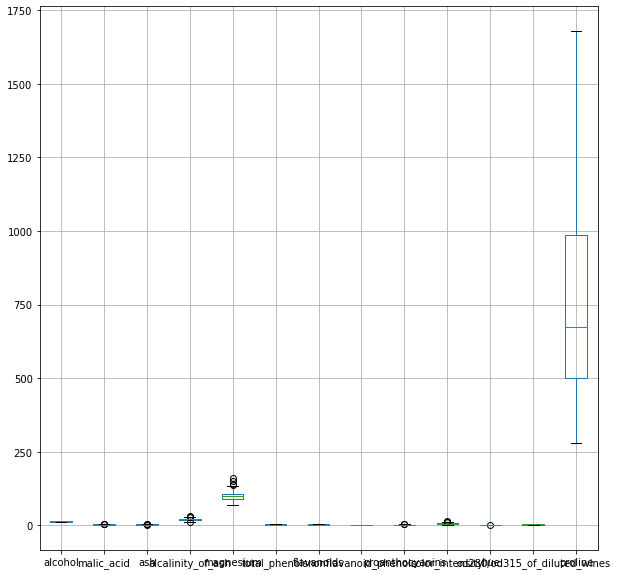

In [ ]:
# Plot a boxplot of each feature (NOT THE LABEL!!) (all in one plot -- you can do this with a single line of code).
# Quiz Q2: Is there any feature that is in a clearly different scale than the others?

# YOUR CODE HERE
df.drop('y',axis=1).boxplot(figsize=(10,10))


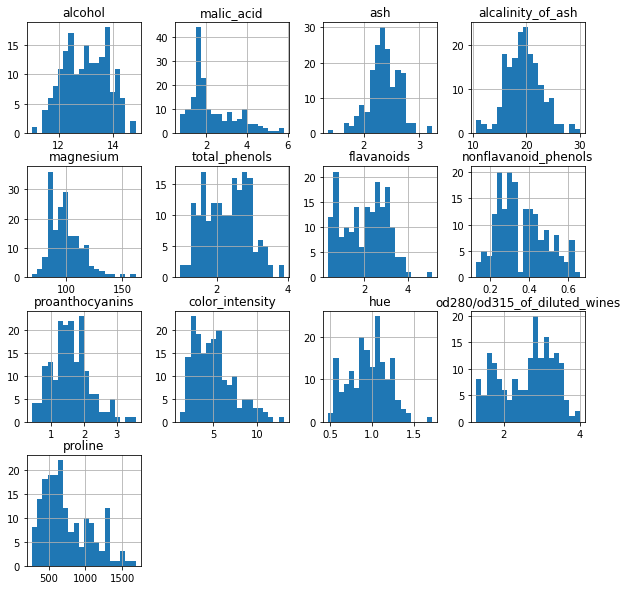

In [ ]:
# Let's look at the distributions of values of our features. Draw a histogram for each of the features

# YOUR CODE HERE
hist = df.drop('y',axis=1).hist(bins=20,figsize=(10,10))

Let's do some multivariate analysis

                               alcohol  malic_acid  ...   proline         y
alcohol                       1.000000    0.094397  ...  0.643720 -0.328222
malic_acid                    0.094397    1.000000  ... -0.192011  0.437776
ash                           0.211545    0.164045  ...  0.223626 -0.049643
alcalinity_of_ash            -0.310235    0.288500  ... -0.440597  0.517859
magnesium                     0.270798   -0.054575  ...  0.393351 -0.209179
total_phenols                 0.289101   -0.335167  ...  0.498115 -0.719163
flavanoids                    0.236815   -0.411007  ...  0.494193 -0.847498
nonflavanoid_phenols         -0.155929    0.292977  ... -0.311385  0.489109
proanthocyanins               0.136698   -0.220746  ...  0.330417 -0.499130
color_intensity               0.546364    0.248985  ...  0.316100  0.265668
hue                          -0.071747   -0.561296  ...  0.236183 -0.617369
od280/od315_of_diluted_wines  0.072343   -0.368710  ...  0.312761 -0.788230
proline     

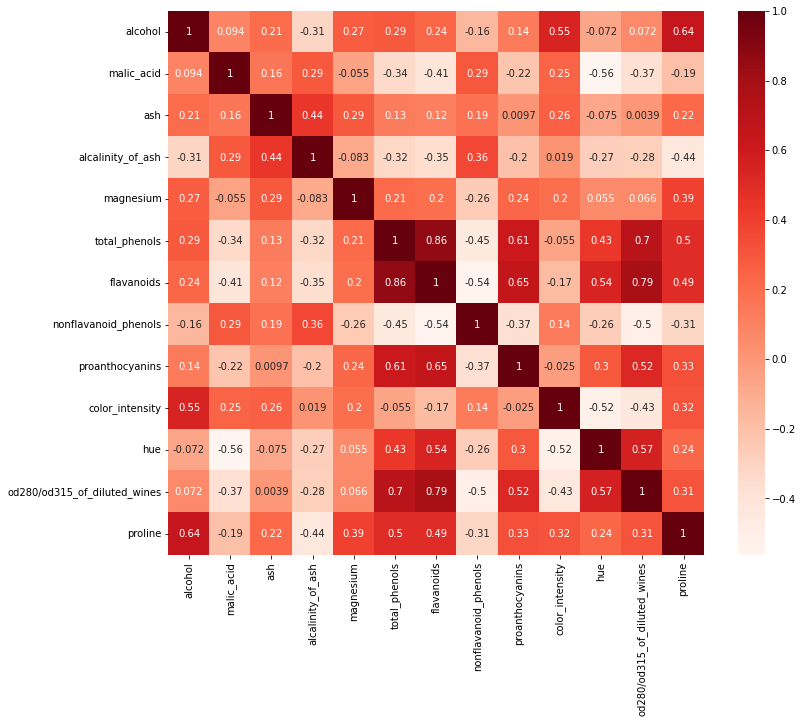

In [ ]:
# Calculate the correlations between each pair of variables
# YOUR CODE HERE
plt.figure(figsize=(12,10))
print(df.corr())
# Plot a heatmap of the correlations between pairs of FEATURES (i.e., don't include the target!)
# YOUR CODE HERE
sns.heatmap(df.drop('y',axis=1).corr(), annot=True, cmap=plt.cm.Reds)
plt.show()


In [ ]:
# What is the highest correlation between features?
print('.86')


.86


You should have noticed that some of the features are highly correlated. 

For this reason, we can run into trouble when trying to train a classifier due to multicolinearity.

Let's do PCA on this dataset to remove these correlations

In [ ]:
# Let's do PCA:
# HINT: I suggest you attempt Q5 of the quiz and then use the function you developed
#       in this and some of the following cells.

# 1. Standardise your data using a StandardScaler. Make sure you're not scaling the 'y'!
# YOUR CODE HERE
dff=df.drop('y',axis=1)
dff_std = StandardScaler().fit_transform(dff)

# 2. Do PCA with 2 components. How much variance is retained from the original dataset?
# YOUR CODE HERE
pca = PCA(n_components=2)
x_pca = pca.fit_transform(dff_std)
# We can see the explained variance (w.r.t. original dataset) ratio of each component:
print(pca.explained_variance_ratio_)

[0.36198848 0.1920749 ]


In [ ]:
# Plot your two components, using the label from the data to colour the points
# YOUR CODE HERE
import plotly.express as px

total_var = pca.explained_variance_ratio_.sum()*100
labels = {str(i): f"PC {i+1}" for i in range(2)}
labels['color'] = 'Median Price'

fig = px.scatter_matrix(
    x_pca,dimensions=range(2),
    labels=labels,title=f'Total Explained Variance: {total_var:.2f}%',
)
fig.update_traces(diagonal_visible=False)
fig.show()


In [ ]:
# How many components do you need to keep at least 85% of the variance in the dataset? (Q6)

# YOUR CODE HERE


In [ ]:
# How much variance is retained if we do PCA with 3 components? (Q7)

# YOUR CODE HERE
# 2. Do PCA with 2 components. How much variance is retained from the original dataset?
# YOUR CODE HERE
pca = PCA(n_components=3)
x_pca = pca.fit_transform(dff_std)
# We can see the explained variance (w.r.t. original dataset) ratio of each component:
print(pca.explained_variance_ratio_)
total_var = pca.explained_variance_ratio_.sum()*100
total_var

[0.36198848 0.1920749  0.11123631]


66.52996889318523

## Clustering

Let's see how many clusters does K-Means find.



In [ ]:
# Use the elbow method to select the number of clusters in your data using 3 PCs.

# YOUR CODE HERE


In [ ]:
# Now use the silhouette score to choose between the two candidate k values from the previous cell

# YOUR CODE HERE


In [ ]:
# Visualise the first two pcs (using a scatterplot) using the labels from KMeans with your chosen value of k

# YOUR CODE HERE


Now we can try to understand our clusters.

In [ ]:
# In the original (before PCA and before standardisation) dataframe, add a column called 'cluster' that contains
# the cluster assignment from above

# YOUR CODE HERE


In [ ]:
# Do a boxplot of each feature, separating between clusters

# YOUR CODE HERE


Write your observations here.
For example: is there a clear difference between the clusters in terms of alcohol content? What about flavanoids?

In [ ]:
# Feel free to keep playing with the data here!